In [ ]:
from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'))
print(f"Categories:{newsgroups_train.target_names}")
print(f"Number of Categories:{len(newsgroups_train.target_names)}")
print(f"Number of Training Documents:{len(newsgroups_train.data)}")
print(f"Number of Test Documents:{len(newsgroups_test.data)}")

Categories:['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
Number of Categories:20
Number of Training Documents:11314
Number of Test Documents:7532


In [ ]:
type(newsgroups_train)

sklearn.utils._bunch.Bunch

In [ ]:
import re
from nltk.tokenize import word_tokenize
from string import punctuation
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from datetime import datetime
import contractions
def cleaning(text):
    text=text.lower()
    expanded_words = []
    for word in text.split():
      expanded_words.append(contractions.fix(word))
    text=' '.join(expanded_words)
    text=re.sub("\d+", "", text)
    text=re.sub(r'http\S+', '', text)
    text=re.sub('\S+@\S+','', text)
    text=re.sub(r'[^\w\s]', '', text)
    text=[w for w in text.split() if not w.lower() in set(stopwords.words('english'))]
    finaltext = ''
    for i in text:
        finaltext+=(WordNetLemmatizer().lemmatize(i))+' '
    return finaltext

In [ ]:
newsgroups_train.data=[cleaning(text) for text in newsgroups_train.data]
newsgroups_test.data=[cleaning(text) for text in newsgroups_test.data]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(max_features=10000)
X_train=vectorizer.fit_transform(newsgroups_train.data)
X_test=vectorizer.fit_transform(newsgroups_test.data)
y_train=newsgroups_train.target
y_test=newsgroups_test.target

<BarContainer object of 4 artists>

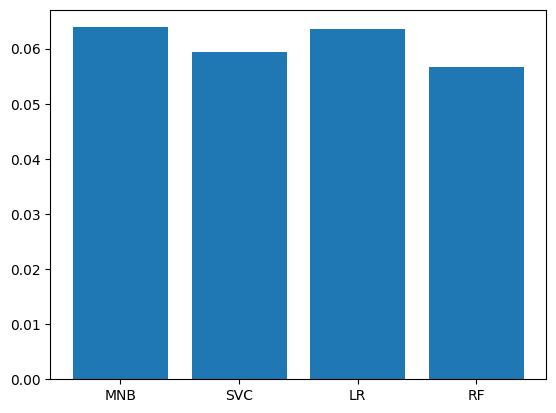

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
MNB=MultinomialNB().fit(X_train,y_train)
MNB_pred=MNB.predict(X_test)
accuracy1=accuracy_score(y_test,MNB_pred)
SVCM=SVC().fit(X_train,y_train)
SVC_pred=SVCM.predict(X_test)
accuracy2=accuracy_score(y_test,SVC_pred)
LR=LogisticRegression().fit(X_train,y_train)
LR_pred=LR.predict(X_test)
accuracy3=accuracy_score(y_test,LR_pred)
RF=RandomForestClassifier().fit(X_train,y_train)
RF_pred=RF.predict(X_test)
accuracy4=accuracy_score(y_test,RF_pred)
name=['MNB','SVC','LR','RF']
scores=[accuracy1,accuracy2,accuracy3,accuracy4]
plt.bar(name,scores)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
kmeans=KMeans(n_clusters=20,init='k-means++', n_init='auto')
kmeans.fit(X_train)

KMeans(n_clusters=20, n_init='auto')

In [ ]:
pred=kmeans.predict(X_test)
score = silhouette_score(X_train,kmeans.labels_)

In [ ]:
score

-0.019067072691693023

Seeing the poor accuracy

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
X_train=vectorizer.fit_transform(newsgroups_train.data)
X_test=vectorizer.transform(newsgroups_test.data)
y_train=newsgroups_train.target
y_test=newsgroups_test.target

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<BarContainer object of 4 artists>

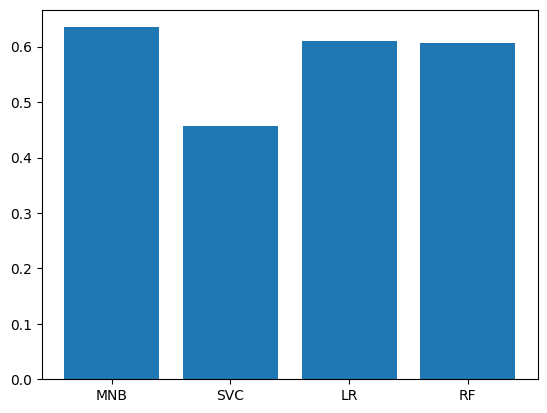

In [41]:
MNB=MultinomialNB().fit(X_train,y_train)
MNB_pred=MNB.predict(X_test)
accuracy1=accuracy_score(y_test,MNB_pred)
SVCM=SVC().fit(X_train,y_train)
SVC_pred=SVCM.predict(X_test)
accuracy2=accuracy_score(y_test,SVC_pred)
LR=LogisticRegression().fit(X_train,y_train)
LR_pred=LR.predict(X_test)
accuracy3=accuracy_score(y_test,LR_pred)
RF=RandomForestClassifier().fit(X_train,y_train)
RF_pred=RF.predict(X_test)
accuracy4=accuracy_score(y_test,RF_pred)
name=['MNB','SVC','LR','RF']
scores=[accuracy1,accuracy2,accuracy3,accuracy4]
plt.bar(name,scores)

In [42]:
kmeans=KMeans(n_clusters=20,init='k-means++', n_init='auto')
kmeans.fit(X_train)

KMeans(n_clusters=20, n_init='auto')

In [43]:
pred=kmeans.predict(X_test)
score = silhouette_score(X_train,kmeans.labels_)
print(score)

0.687514494997367


We see that CountVectoriser has given better accuracy score and the silhouette score for the same is above 0.5 meaning the clusters are well defined.
Kmeans was done for 20 classes
Classification was done using MultinomialNB, Logistic regression, Randomforest Classifier and SVC